Import Packages

In [42]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [43]:
parent_dir = '../../data/ping_pong/'

NMSG = 50_000_000
ITERATIONS = 15
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}6/ping_pong_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}6/ping_pong_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}6/ping_pong_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}6/ping_pong_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [44]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 14 11:23:02 2025 +0100) (509.14ms ela...,0.332,0.0000,0.535,2.70,0.11,7.52,73.67 C,Nominal
1,(Fri Mar 14 11:23:03 2025 +0100) (508.69ms ela...,4.910,0.0624,0.810,7.10,0.77,48.81,73.11 C,Nominal
2,(Fri Mar 14 11:23:03 2025 +0100) (505.31ms ela...,11.200,0.1060,1.120,13.75,1.50,98.41,73.11 C,Nominal
3,(Fri Mar 14 11:23:04 2025 +0100) (505.42ms ela...,5.240,0.0661,0.662,8.20,0.67,37.29,72.73 C,Nominal
4,(Fri Mar 14 11:23:04 2025 +0100) (505.75ms ela...,3.020,0.1140,0.904,5.58,0.75,42.64,72.73 C,Nominal


In [45]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(1297, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 14 11:23:14 2025 +0100) (1007.26ms el...,39.2,0.1400,1.040,43.93,3.94,98.93,74.39 C,Nominal
1,(Fri Mar 14 11:23:15 2025 +0100) (1003.73ms el...,36.7,0.2410,0.948,41.37,3.83,97.82,77.81 C,Nominal
2,(Fri Mar 14 11:23:16 2025 +0100) (1003.92ms el...,36.7,0.0559,0.688,40.87,3.84,99.13,80.88 C,Nominal
3,(Fri Mar 14 11:23:17 2025 +0100) (1006.15ms el...,35.8,0.0521,0.617,39.67,3.81,98.40,83.12 C,Nominal
4,(Fri Mar 14 11:23:18 2025 +0100) (1003.84ms el...,35.4,0.0135,0.610,39.17,3.83,98.37,85.15 C,Nominal


In [46]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 14 11:52:22 2025 +0100) (509.24ms ela...,7.150,0.0725,0.940,9.57,0.96,56.83,58.54 C,Nominal
1,(Fri Mar 14 11:52:22 2025 +0100) (505.47ms ela...,5.560,0.0462,0.809,7.77,0.79,50.50,58.54 C,Nominal
2,(Fri Mar 14 11:52:23 2025 +0100) (504.82ms ela...,2.340,0.1050,0.889,4.83,0.71,46.13,58.49 C,Nominal
3,(Fri Mar 14 11:52:24 2025 +0100) (508.17ms ela...,0.568,0.0633,0.718,2.78,0.41,25.76,58.49 C,Nominal
4,(Fri Mar 14 11:52:24 2025 +0100) (508.16ms ela...,0.218,0.0000,0.528,2.09,0.14,8.34,58.39 C,Nominal


In [47]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(556, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 14 11:52:34 2025 +0100) (1009.28ms el...,17.0,0.0557,0.835,19.38,1.57,96.88,61.43 C,Nominal
1,(Fri Mar 14 11:52:35 2025 +0100) (1006.08ms el...,13.0,0.0332,0.598,15.26,1.06,98.32,64.32 C,Nominal
2,(Fri Mar 14 11:52:36 2025 +0100) (1005.54ms el...,14.9,0.0261,0.626,17.03,1.27,98.22,67.09 C,Nominal
3,(Fri Mar 14 11:52:37 2025 +0100) (1006.13ms el...,13.6,0.0000,0.561,15.72,1.11,98.58,69.02 C,Nominal
4,(Fri Mar 14 11:52:38 2025 +0100) (1006.02ms el...,16.2,0.0000,0.712,18.66,1.46,98.66,71.09 C,Nominal


Clean the Data

In [48]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [49]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [50]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-14 11:23:02,0.332,0.0000,0.535,2.70,0.11,7.52,73.67,Nominal,509.14
1,2025-03-14 11:23:03,4.910,0.0624,0.810,7.10,0.77,48.81,73.11,Nominal,508.69
2,2025-03-14 11:23:03,11.200,0.1060,1.120,13.75,1.50,98.41,73.11,Nominal,505.31
3,2025-03-14 11:23:04,5.240,0.0661,0.662,8.20,0.67,37.29,72.73,Nominal,505.42
4,2025-03-14 11:23:04,3.020,0.1140,0.904,5.58,0.75,42.64,72.73,Nominal,505.75


In [51]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(1297, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-14 11:23:14,39.2,0.1400,1.040,43.93,3.94,98.93,74.39,Nominal,1007.26
1,2025-03-14 11:23:15,36.7,0.2410,0.948,41.37,3.83,97.82,77.81,Nominal,1003.73
2,2025-03-14 11:23:16,36.7,0.0559,0.688,40.87,3.84,99.13,80.88,Nominal,1003.92
3,2025-03-14 11:23:17,35.8,0.0521,0.617,39.67,3.81,98.40,83.12,Nominal,1006.15
4,2025-03-14 11:23:18,35.4,0.0135,0.610,39.17,3.83,98.37,85.15,Nominal,1003.84


In [52]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-14 11:52:22,7.150,0.0725,0.940,9.57,0.96,56.83,58.54,Nominal,509.24
1,2025-03-14 11:52:22,5.560,0.0462,0.809,7.77,0.79,50.50,58.54,Nominal,505.47
2,2025-03-14 11:52:23,2.340,0.1050,0.889,4.83,0.71,46.13,58.49,Nominal,504.82
3,2025-03-14 11:52:24,0.568,0.0633,0.718,2.78,0.41,25.76,58.49,Nominal,508.17
4,2025-03-14 11:52:24,0.218,0.0000,0.528,2.09,0.14,8.34,58.39,Nominal,508.16


In [53]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(556, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-14 11:52:34,17.0,0.0557,0.835,19.38,1.57,96.88,61.43,Nominal,1009.28
1,2025-03-14 11:52:35,13.0,0.0332,0.598,15.26,1.06,98.32,64.32,Nominal,1006.08
2,2025-03-14 11:52:36,14.9,0.0261,0.626,17.03,1.27,98.22,67.09,Nominal,1005.54
3,2025-03-14 11:52:37,13.6,0.0000,0.561,15.72,1.11,98.58,69.02,Nominal,1006.13
4,2025-03-14 11:52:38,16.2,0.0000,0.712,18.66,1.46,98.66,71.09,Nominal,1006.02


Visualize the Data

In [54]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    
    # idle_df["Elapsed Time (s)"] = (idle_df["Timestamp"] - idle_df["Timestamp"].iloc[0]).dt.total_seconds()
    # bench_df["Elapsed Time (s)"] = (bench_df["Timestamp"] - bench_df["Timestamp"].iloc[0]).dt.total_seconds()

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


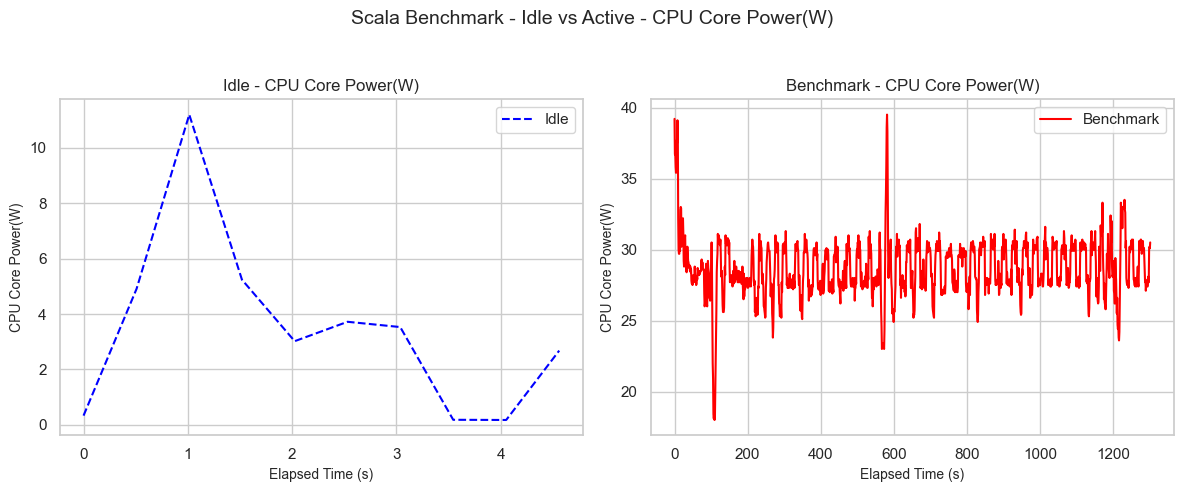

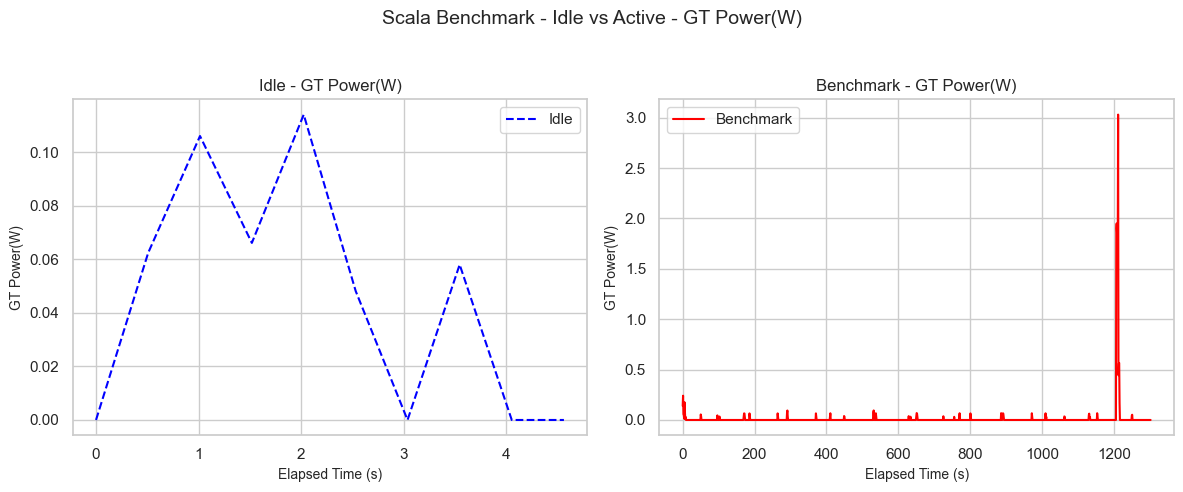

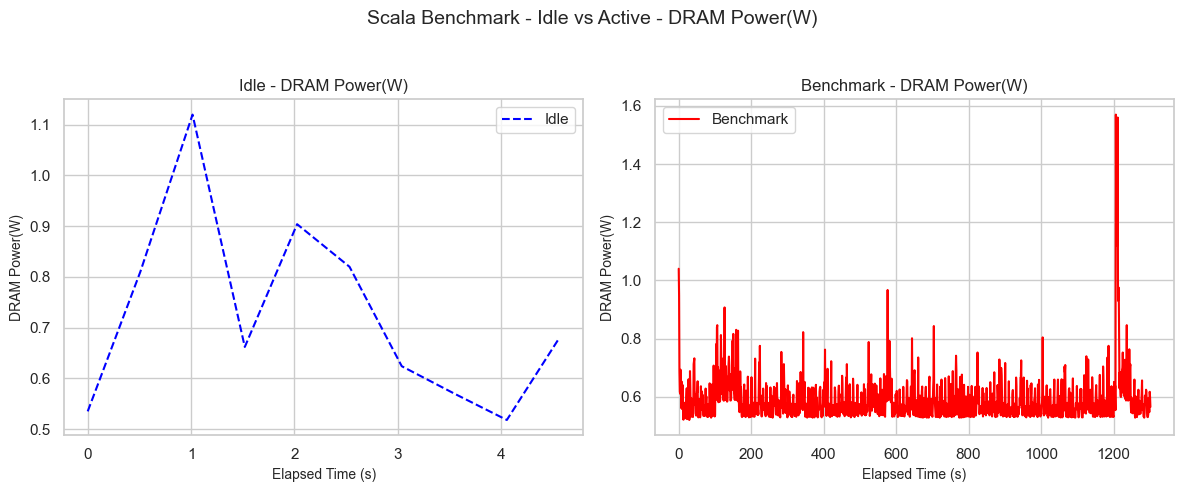

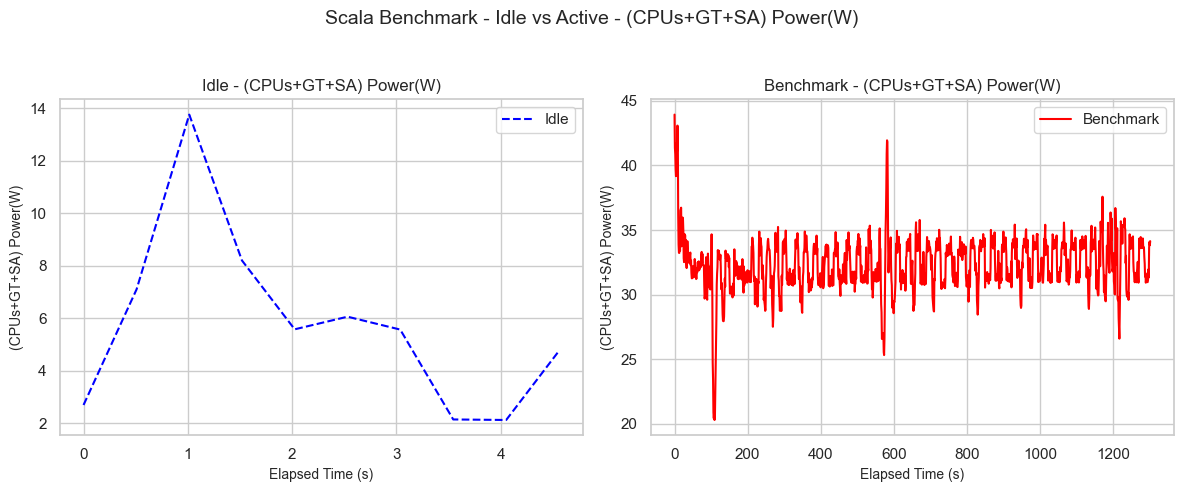

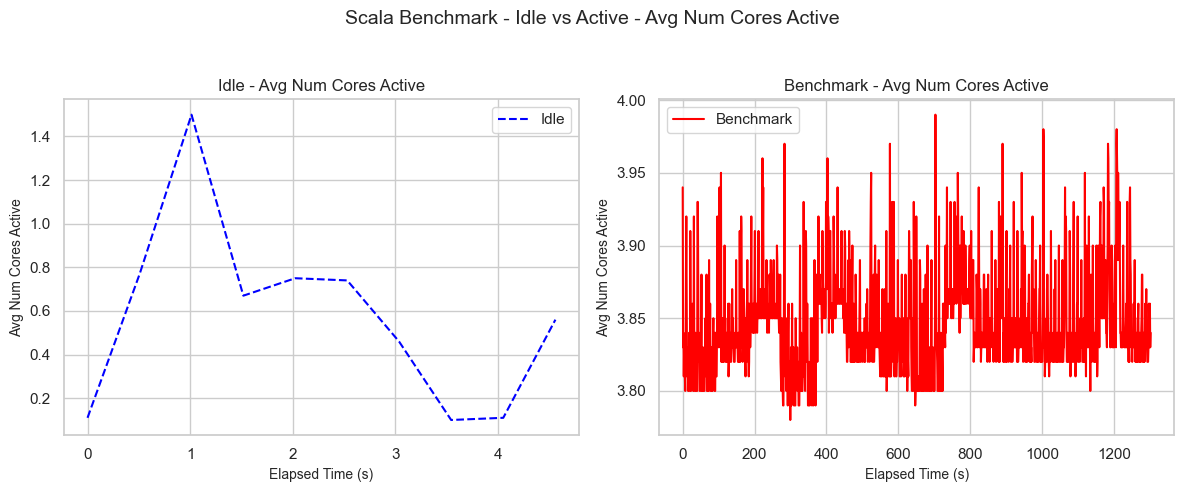

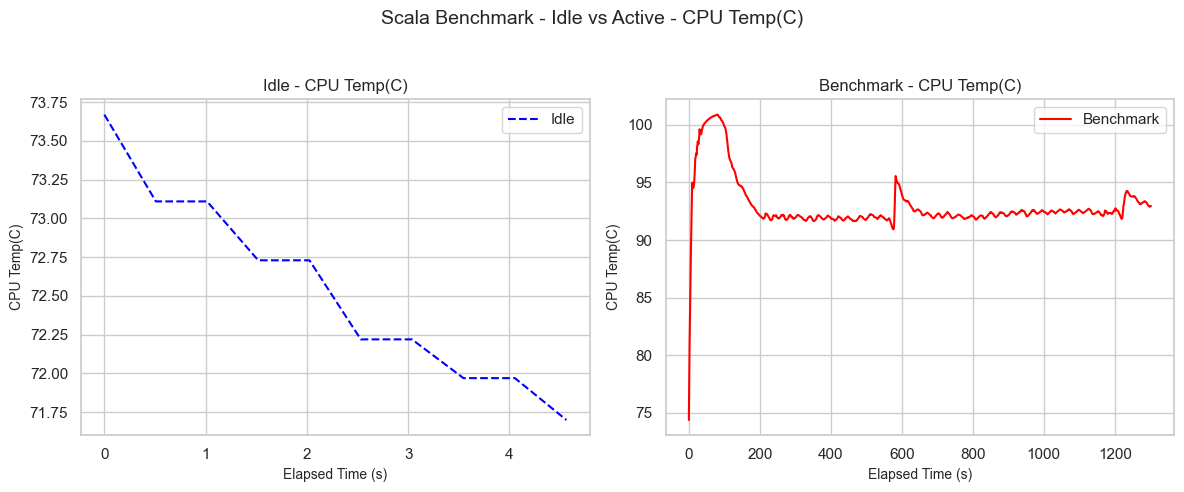

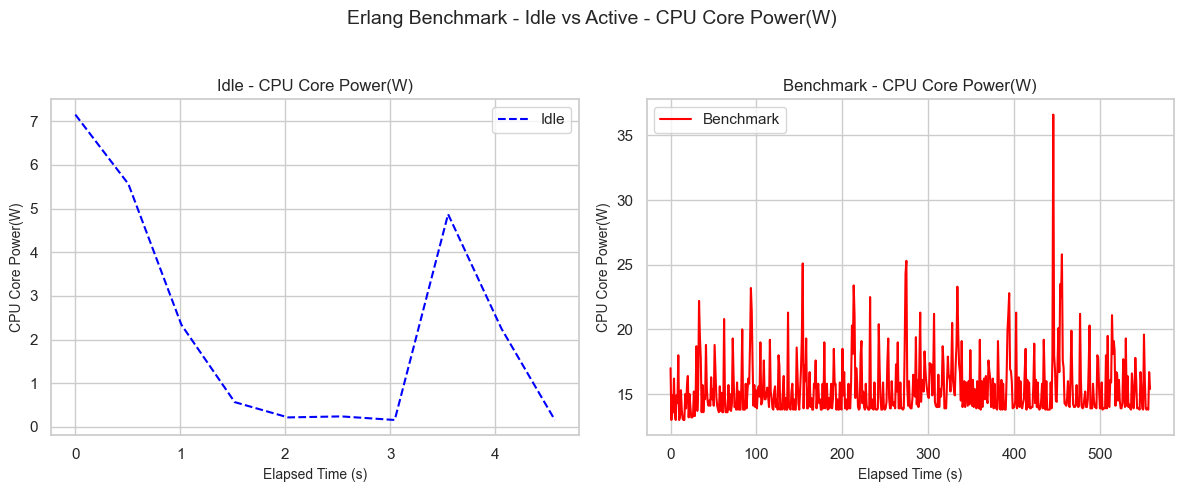

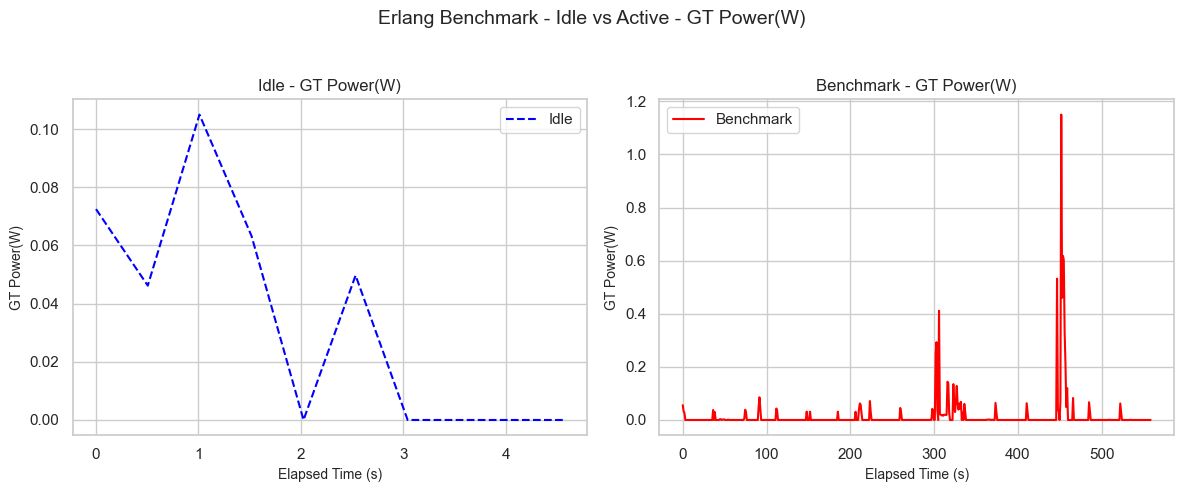

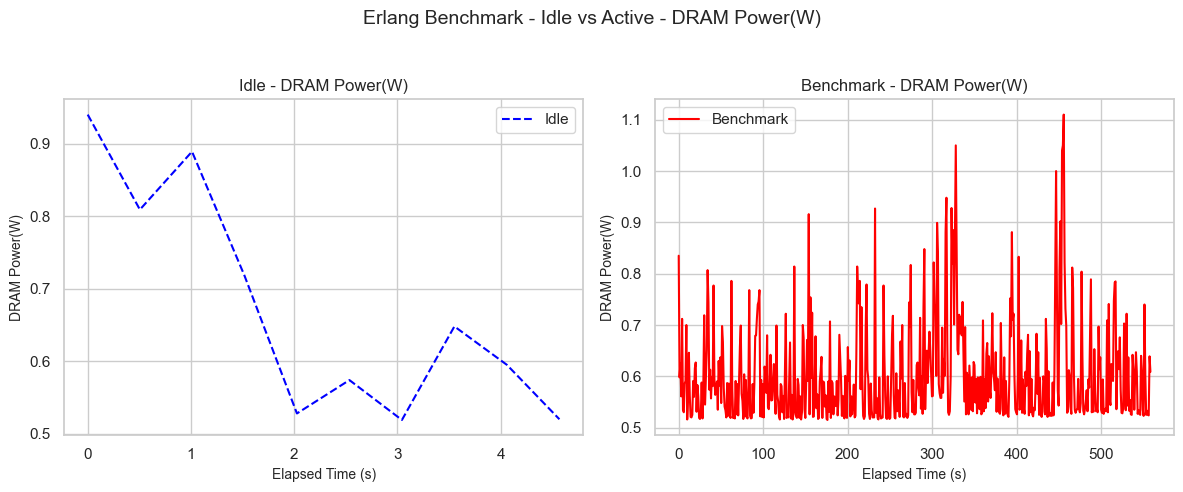

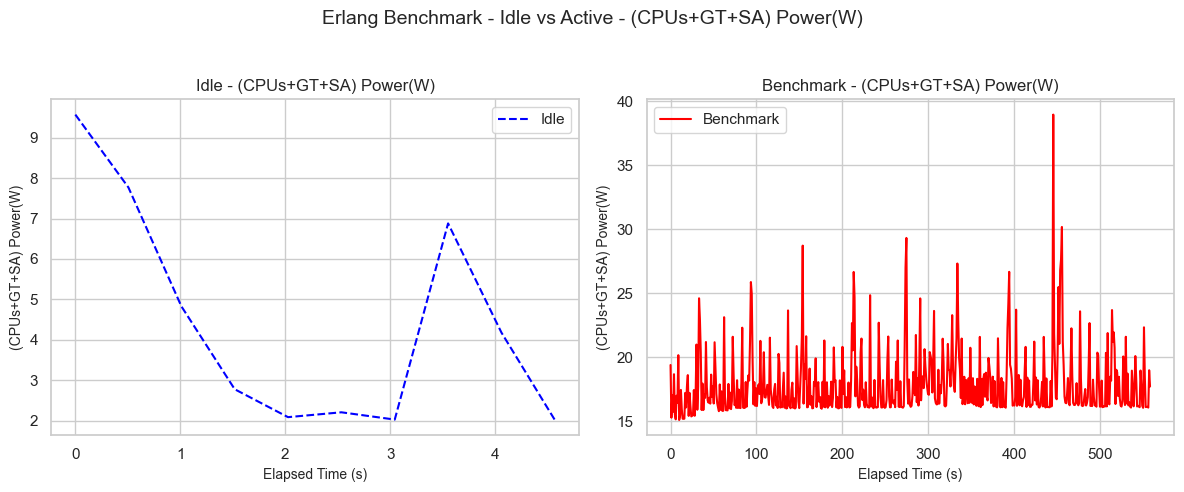

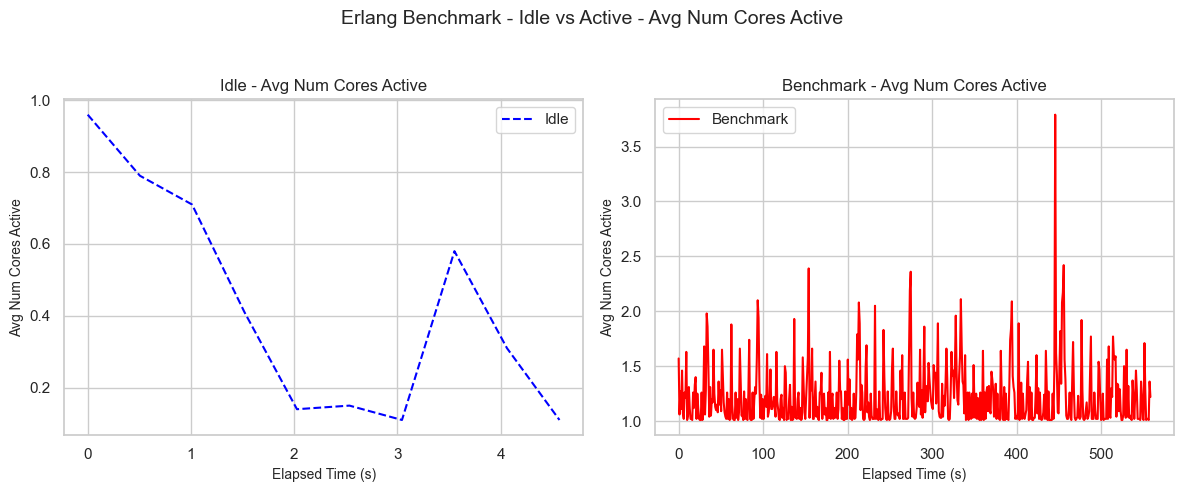

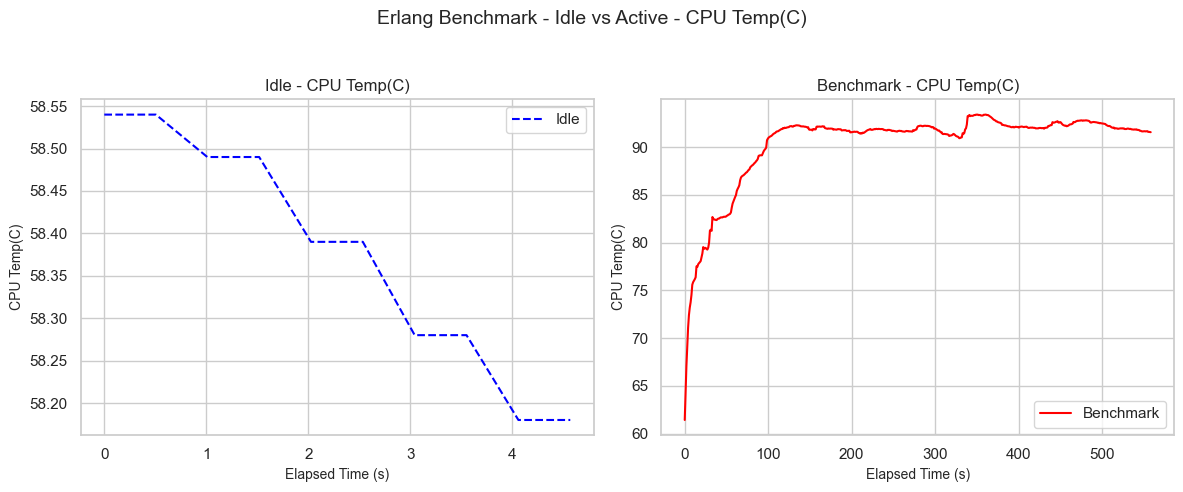

In [55]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [56]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [57]:
def format_message_count(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

message_label = format_message_count(NMSG)
title_config_prefix = f"({message_label} Messages, {ITERATIONS} Iterations)"

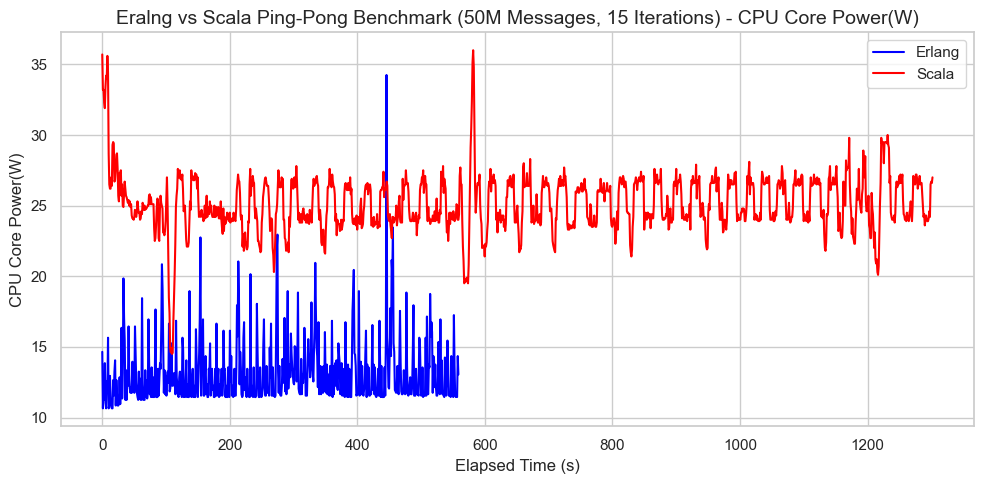

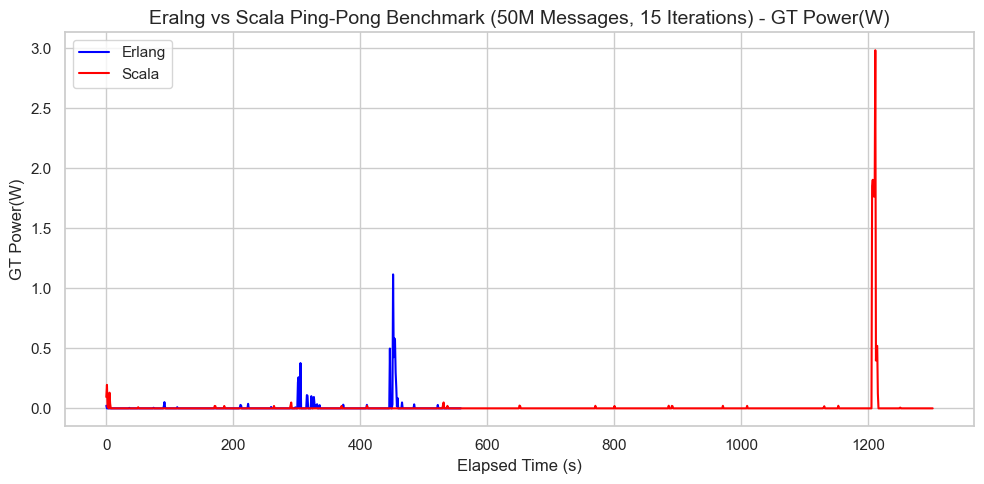

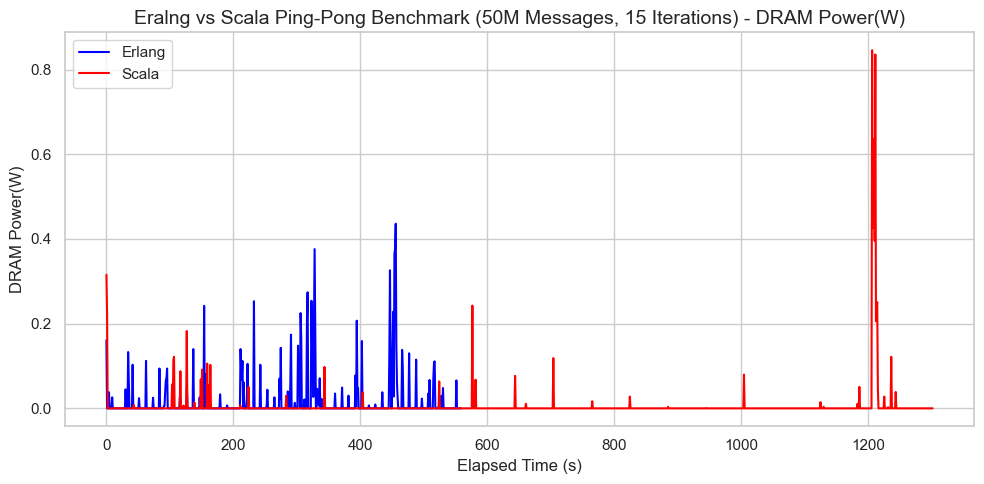

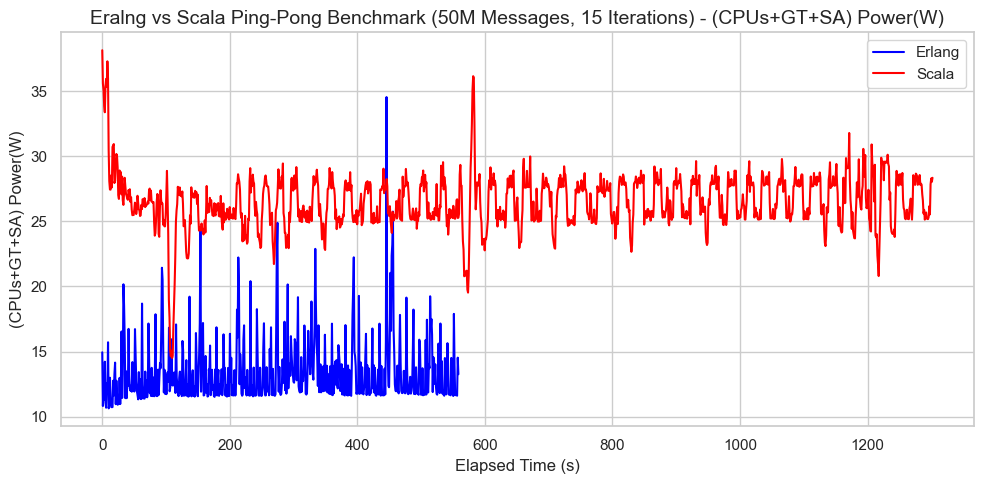

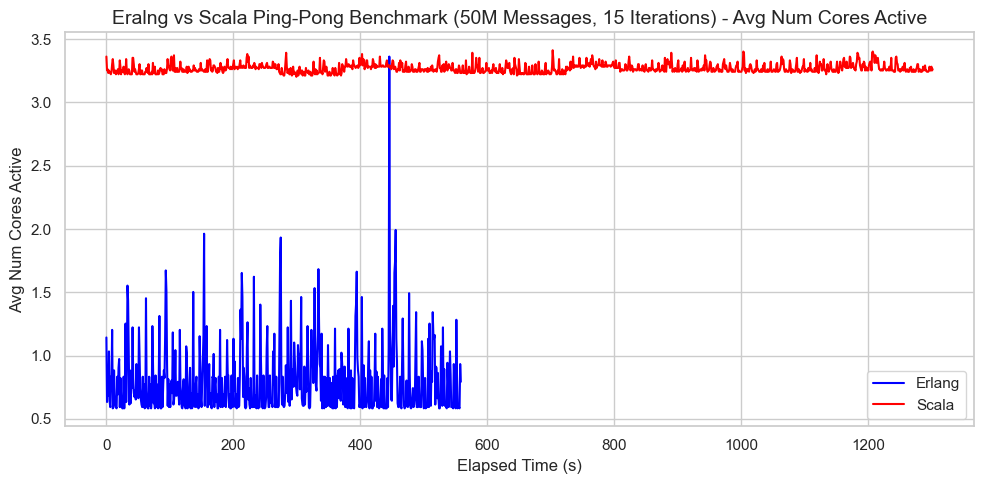

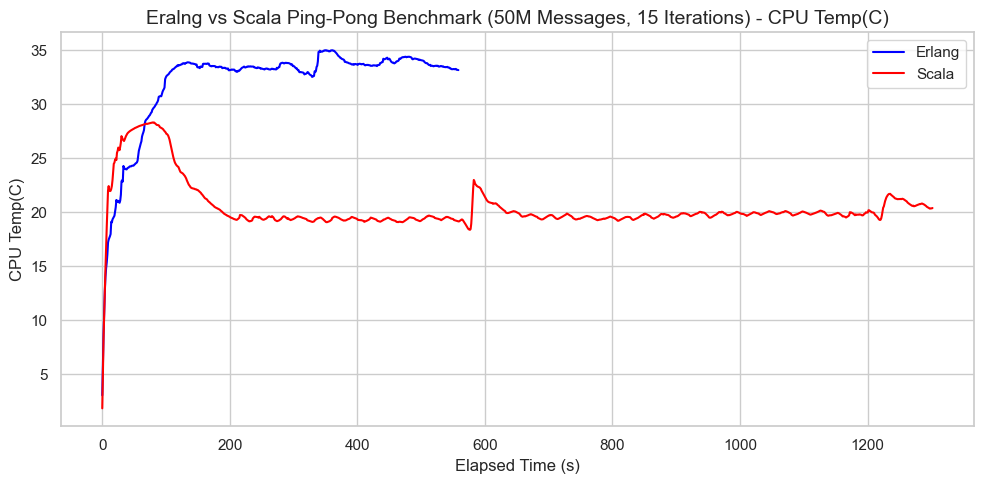

In [58]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Ping-Pong Benchmark {title_config_prefix}")


Compute Average Metrics

In [59]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [60]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        25.133945
GT Power(W)              -0.031788
DRAM Power(W)            -0.136369
(CPUs+GT+SA) Power(W)    26.484860
CPU Temp(C)              20.422466
Avg Num Cores Active      3.269214
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        13.184651
GT Power(W)              -0.019152
DRAM Power(W)            -0.070621
(CPUs+GT+SA) Power(W)    13.447147
CPU Temp(C)              31.997669
Avg Num Cores Active      0.800518
dtype: float64


Compute Total Energy Consumption

In [61]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Number of Messages": NMSG,
    "Iterations": ITERATIONS,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["Number of Messages"] == NMSG) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for Number of Messages =", NMSG, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../data/ping_pong/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 34504.636743765834 Joules
Erlang Benchmark: 7522.446585120323 Joules
